# COVID-19 growth analysis

(c) 2020, [Thomas Wiecki](https://twitter.com/twiecki)<br>
Adapted for South Africa by [Alta de Waal](https://twitter.com/AltadeWaal) 

This notebook gets up-to-date data from the [Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa [Hosted by DSFSI group at University of Pretoria]](https://github.com/dsfsi/covid19za) and recreates the (pay-walled) plot in the [Financial Times]( https://www.ft.com/content/a26fbf7e-48f8-11ea-aeb3-955839e06441).

In [78]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
sns.set_context('talk')
plt.style.use('seaborn-whitegrid')

## Load data

In [101]:
def load_timeseries(name):
    df = pd.read_csv(name)
    df = (df.set_index('date'))
    df.index = pd.to_datetime(df.index, dayfirst=True)
    
    return df

df = load_timeseries('data/covid19za_timeline_confirmed.csv')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


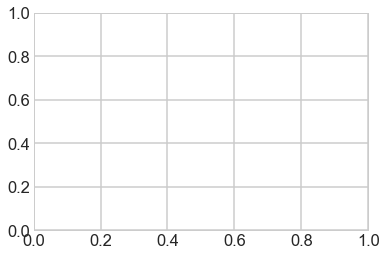

In [141]:
df.head()

In [176]:
def plot_confirmed(provinces, min_cases=100, ls='-'):
    for province in provinces:
        
        df1 = df.loc[(df.province == province)].groupby(['date']).agg({'country': ['count']})
        df1.columns = ['new cases']
        df1['cummulative'] = df1['new cases'].cumsum()
        (df1.reset_index()['cummulative']
            .plot(label=province, ls=ls))
        print('\n' + province +":")
        print(df1)



GP:
            new cases  cummulative
date                              
2020-03-07          1            1
2020-03-11          4            5
2020-03-12          1            6
2020-03-13          6           12

WC:
            new cases  cummulative
date                              
2020-03-11          1            1
2020-03-13          2            3

KZN:
            new cases  cummulative
date                              
2020-03-05          1            1
2020-03-08          1            2
2020-03-11          1            3
2020-03-12          1            4


Text(0.1, 0.01, 'Based on Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa [Hosted by DSFSI group at University of Pretoria]')

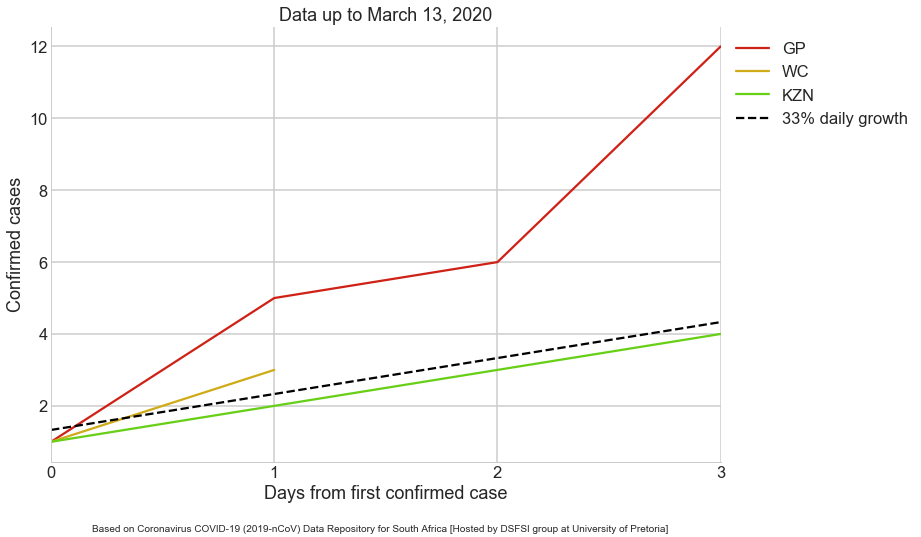

In [177]:
# sns.set_palette(sns.hls_palette(8, l=.45, s=.8)) # 8 countries max
fig, ax = plt.subplots(figsize=(12, 8))

provinces = ['GP', 'WC', 'KZN']
plot_confirmed(provinces, min_cases=1, ls='-')



x = np.linspace(0, plt.xlim()[1])
plt.plot(x,x+(1.33), ls='--', color='k', label='33% daily growth')

#plt.yscale('log');
plt.title('Data up to {}'.format(df.index.max().strftime('%B %d, %Y')))
plt.xlabel('Days from first confirmed case')
plt.ylabel('Confirmed cases')
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks(range(0,int(plt.xlim()[1])+1))
plt.legend(bbox_to_anchor=(1.0, 1.0))
sns.despine()
plt.annotate('Based on Coronavirus COVID-19 (2019-nCoV) Data Repository for South Africa [Hosted by DSFSI group at University of Pretoria]', 
             (0.1, 0.01), xycoords='figure fraction', fontsize=10)
